l^{´}= [8.45352023e+07 1.69070410e+08 2.53606472e+08 3.38139563e+08
 4.22621856e+08 5.07150481e+08 5.91685049e+08 6.76247189e+08
 7.60732697e+08 8.45350484e+08 1.69073522e+09 2.53575772e+09
 3.38097002e+09 4.22642822e+09 5.07138512e+09 5.91667210e+09
 6.76197740e+09 7.60717023e+09 8.45280514e+09 1.69064378e+10
 2.53594755e+10 3.38118757e+10 4.22655541e+10 5.07183123e+10
 5.91689321e+10 6.76289880e+10 7.60774362e+10]


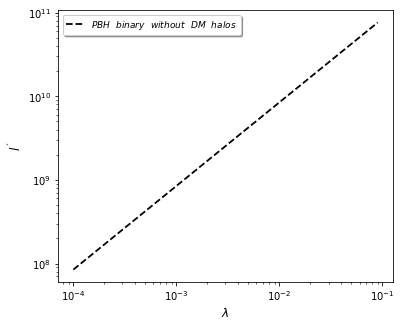

In [58]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity


# Repoducing the result of eq.(14) (with λ-values) in research paper "The merger rate of
# primordial-black-hole binaries" for radiation domination.


#eq.(49) in the reference pdf "Angular momentum in the PBH binary".



A=(((3/(8*G*π*rho_eq))**(1/2)))

def Y(a,b):
    return (np.trapz(a,b))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
l_1_list=np.zeros(len(λ_1_list))


def Integral(λ_0):    
    def f(u,s,λ_0):
        return  [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]
    b=((2*λ_0)/10000)
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000)  # not right as the final value of scale factor, s does not corresponds to the 
                                   # radiation domintaion era.
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand=(χ/s_telda)
    y=np.trapz(integrand,s_list)
    Y=A*y
    return Y

for i, λ_0 in enumerate(λ_1_list):
        l_1_list[i] = (Integral(λ_0))
print('l^{´}=',l_1_list)          
 
    
    

plt.rc('lines', linewidth=1.8)
plt.figure(figsize=(6,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.loglog(λ_1_list,l_1_list,'k--')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=16)    
plt.show()

l^{´}= [8.45346808e+07 1.69072128e+08 2.53610520e+08 3.38143279e+08
 4.22609053e+08 5.07130295e+08 5.91677165e+08 6.76203512e+08
 7.60708507e+08 8.45225192e+08 1.69060029e+09 2.53556328e+09
 3.38039924e+09 4.22514974e+09 5.07034999e+09 5.91438569e+09
 6.75913963e+09 7.60338118e+09 8.44731158e+09 1.68825481e+10
 2.53104159e+10 3.37378749e+10 4.21587025e+10 5.05733311e+10
 5.89821118e+10 6.73704227e+10 7.57486669e+10]


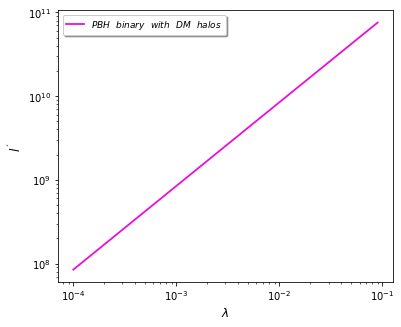

In [59]:
#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# in radiation-domination.


#Solution of eq.(47) using extended mass function in reference
# pdf "Angular momentum in the PBH binary".




A=(((3/(8*G*π*rho_eq))**(1/2)))
B=((((8*π*G*rho_eq*((t_eq)**6))/3)**(1/4)))

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 

def λ_r(s):
    return ((λ_0)/(n_r(s)))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

L_r=np.zeros(len(λ_1_list))

def integral(λ_0):  
    def f(u,s,λ_0):                                # radiation-domination case
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]  
    separation0= [1e-12,1]
    b= ((2*λ_0)/10000)
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand_1=( χ/s_telda)
    integrand_2=(χ/s_list) 
    Y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(47) in pdf "Angular momentum in the PBH binary".
    Z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(47) in pdf "Angular momentum in the PBH binary".
    X=(A*Y)+(B*Z)
    return X

    
for i, λ_0 in enumerate(λ_1_list):
    L_r[i] = integral(λ_0)
print('l^{´}=',L_r)        
 
    
plt.figure(figsize=(6,5))
plt.loglog(λ_1_list,L_r,'#ED0DD9')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

Slope,m= 8.4222e+11
Intercept,b= 1.2902e+07


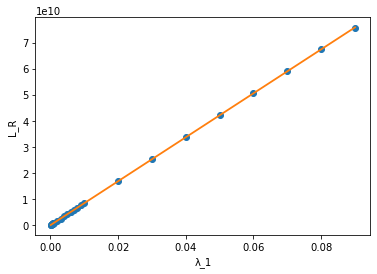

In [60]:
L_R=np.array(L_r)

λ_1=np.array(λ_1_list)



m, b = np.polyfit(λ_1, L_R, 1)


print("Slope,m=",'%0.4e'%m)
print("Intercept,b=",'%0.4e'%b)

plt.plot(λ_1,L_R , 'o')
plt.xlabel('λ_1')
plt.ylabel('L_R')
plt.plot(λ_1, m*λ_1 + b,'')
plt.show()

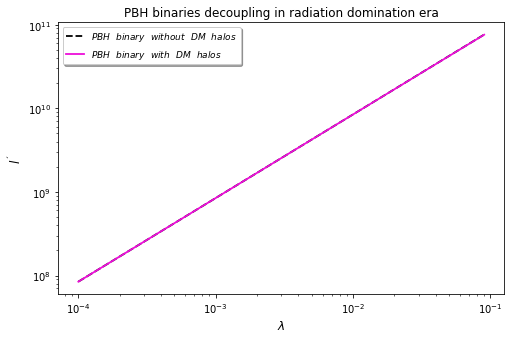

In [62]:
#Variation of  l^{'} with λ for the PBH binary with and without DM halos decoupling 
# in radiation-domination.

# Comparison of the solutions of eq.(49) and (47).


plt.figure(figsize=(8,5))
plt.loglog(λ_1_list,l_1_list,'k--')
plt.loglog(λ_1_list,L_r,'#ED0DD9')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.title('PBH binaries decoupling in radiation domination era') 
plt.show()

l^{´}= [8.34607886e+11 1.26114318e+12 1.69962685e+12 2.14723745e+12
 2.61542172e+12 3.08990087e+12 3.58560200e+12]


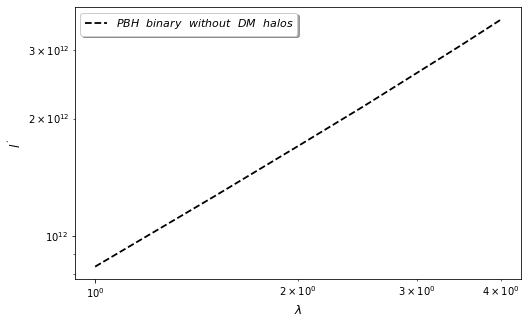

In [65]:
# Repoducing the result of eq.(14) (with λ-values) in research paper "The merger rate of
# primordial-black-hole binaries" PBH binaries ecoupling around matter-radiation equality.


# eq.(53) in reference pdf "Angular momentum in the PBH binary".




A=(3/(8*G*π*rho_eq))**(1/2)
def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   

λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
l_2_list=np.zeros(len(λ_2_list))


    


def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    y=np.trapz(integrand,s_list)
    Y=A*y
    return Y
    
    
for k, λ_0 in enumerate(λ_2_list):
    l_2_list[k] = integral(λ_0)
print('l^{´}=',l_2_list)      
 
    
plt.figure(figsize=(8,5))
plt.loglog(λ_2_list,l_2_list,'k--')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :11},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=17)   
plt.show()   

l^{´}= [1.99080574e+12 3.71379540e+12 5.87910212e+12 8.47616140e+12
 1.14979784e+13 1.49461625e+13 1.88173320e+13]


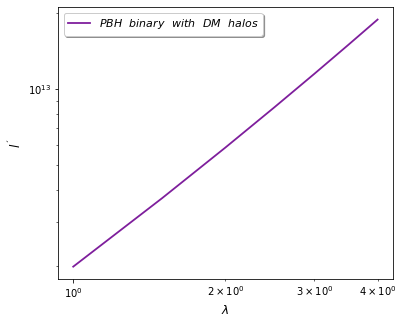

In [66]:
#Variation of  l^{'} with λ for the PBH binary with DM halos decoupling 
# around matter-radiation equality.


# Solution of eq.(56) using extended mass function in reference pdf "Angular momentum 
#  in the PBH binary".

def m(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))))



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))
def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))*H(s))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
L_mr=np.zeros(len(λ_2_list))


def Y(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(56) in reference pdf "Angular momentum in the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((8*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    m_list=np.zeros(len(s_list))
    H_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        I_list[i] = I(s)
        m_list[i] = m(s)
    integrand_1=(χ*H_list*m(s))
    integrand_2=(χ*I_list*m(s)) 
    y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(56) in reference pdf "Angular momentum in the PBH binary".
    X=(A*y)+(z*B)
    return X
    
for i, λ_0 in enumerate(λ_2_list):
    L_mr[i] = Y(λ_0)
print('l^{´}=',L_mr) 

    

plt.figure(figsize=(6,5))
plt.loglog(λ_2_list,L_mr,'#7E1E9C')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :11},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

Slope,m= 5.6117e+12
Intercept,b= -4.6975e+12


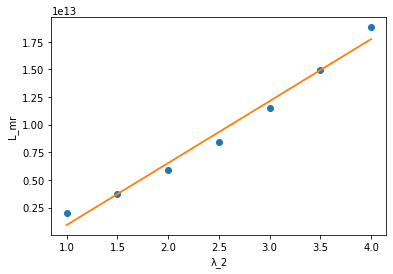

In [67]:
λ_2=np.array(λ_2_list)
L=np.array(L_mr)


m, b = np.polyfit(λ_2, L_mr, 1)


print("Slope,m=",'%0.4e'%m)
print("Intercept,b=",'%0.4e'%b)

plt.plot(λ_2,L_mr , 'o')
plt.xlabel('λ_2')
plt.ylabel('L_mr')
plt.plot(λ_2, m*λ_2 + b,'')
plt.show()

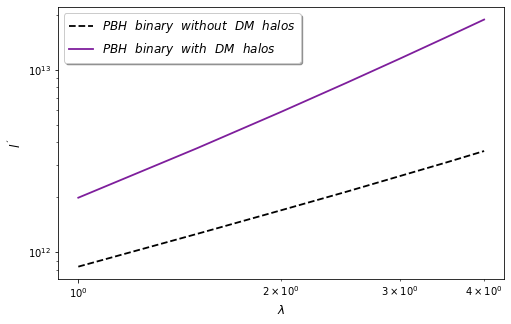

In [69]:
#Variation of  l^{'} with λ for the PBH binary with and without DM halos decoupling 
# around matter-radiation equality.

# Comparison of the solutions of eq.(53) and (56).


plt.figure(figsize=(8,5))
plt.loglog(λ_2_list,l_2_list,'k--')   
plt.loglog(λ_2_list,L_mr,'#7E1E9C')
plt.xlabel('$λ$',fontsize=12)
plt.ylabel('$l^{´}$',fontsize=12)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=16) 
plt.show()

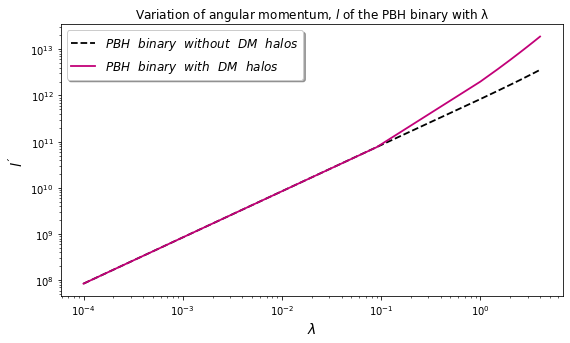

In [71]:
#Variation of l^{'} with λ for the PBH binaries with and without DM halos decoupling 
# in radiation domination to upto matter-radiation equality.



λ_list = λ_1_list+λ_2_list
l = np.append(l_1_list,l_2_list)
L_list=np.append(L_r,L_mr)

plt.figure(figsize=(9,5))

plt.loglog(λ_list,l,'k--')
plt.loglog(λ_list ,L_list,'#C20078')
plt.xlabel('$λ$',fontsize=14)
plt.ylabel('$l^{´}$',fontsize=14)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        

plt.title('Variation of angular momentum, $l$ of the PBH binary with λ')
plt.show()